In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics_from_csv(csv_filepath, title):
    # Read the CSV file
    df = pd.read_csv(csv_filepath)

    # Metrics to plot
    metrics = ['swap_count', 'depth', 'runtime']
    
    # Get unique coupling maps
    coupling_maps = df['cmap'].unique()
    
    # Calculate the number of rows needed for the subplots
    num_cmaps = len(coupling_maps)
    
    # Create a figure with subplots for each coupling map
    fig, axes = plt.subplots(num_cmaps, 3, figsize=(18, 6 * num_cmaps))
    
    # Iterate over each coupling map and metric
    for row, cmap in enumerate(coupling_maps):
        subset_cmap = df[df['cmap'] == cmap]
        for col, metric in enumerate(metrics):
            ax = axes[row, col] if num_cmaps > 1 else axes[col]
            for heuristic in subset_cmap['heuristic'].unique():
                subset_heuristic = subset_cmap[subset_cmap['heuristic'] == heuristic]
                ax.plot(subset_heuristic['num_qubits'], subset_heuristic[metric], label=heuristic, marker='o')
            
            # Set the title and labels
            ax.set_title(f'{cmap} - {metric.capitalize()} vs Num Qubits')
            ax.set_xlabel('Num Qubits')
            ax.set_ylabel(metric.capitalize())
            ax.legend()
            ax.grid(True)

    # Set the overall title for the figure
    plt.suptitle(title)

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Show the plot
    plt.show()


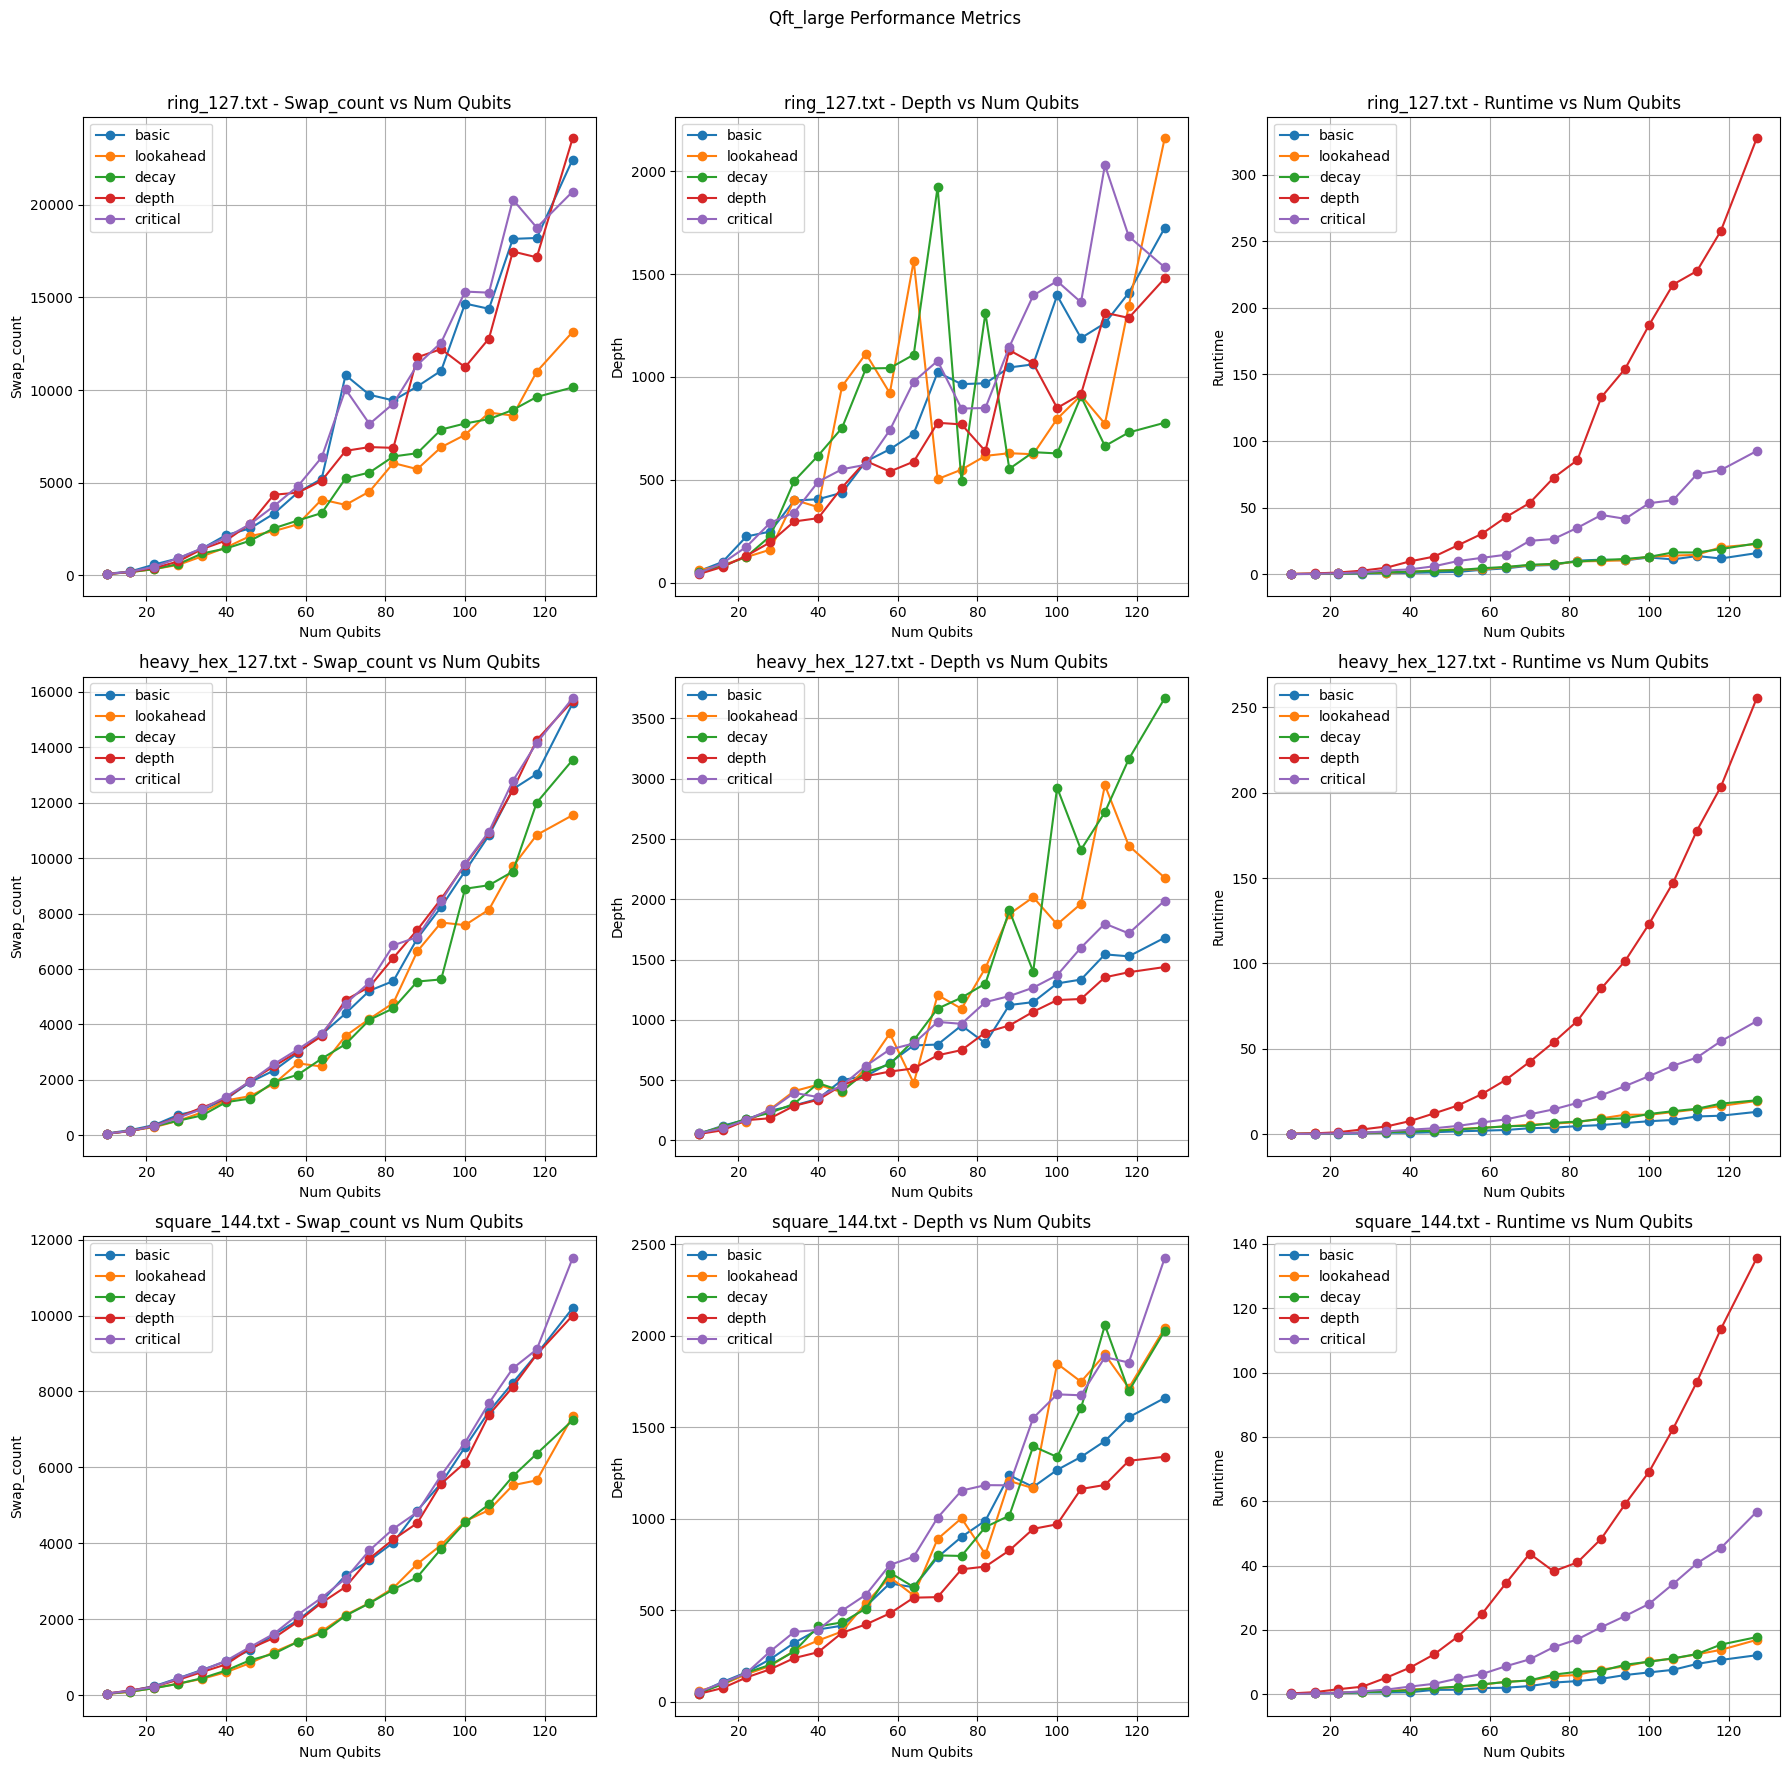

In [2]:
qc_name = "qft_large"
csv_filepath = f'results/{qc_name}.csv'
title = f'{qc_name.capitalize()} Performance Metrics'
plot_metrics_from_csv(csv_filepath, title)